### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [71]:
#Reading in the CSV file
data = pd.read_csv('data/coupons.csv')

In [72]:
#Exploring the data
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [73]:
print("\n=== Dataset Overview ===")
data.info()

print("\n === Dataset Statistics ===")
display(data.describe())

print("\n === Dataset Shape ===")
print(data.shape)


=== Dataset Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar       

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000



 === Dataset Shape ===
(12684, 26)


In [74]:
#Renaming 'passanger' to 'passenger'
data.rename(columns={'passanger':'passenger'}, inplace=True)

#Verifying the Change
print(data.columns)

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')


In [75]:
#Exploring the data
data['gender'].value_counts()
data['age'].value_counts()
print(data['age'].value_counts())
print(data['age'].unique())
print(data['Y'].value_counts())

#Mapping exisiting number lables to numeric values
age_mapping = {
    'below21' : 20,
    '21' : 21,
    '26' : 26,
    '31' : 31,
    '36' : 36,
    '41' : 41,
    '46' : 46,
    '50plus' : 51
}

#Assigning new mapping to the new column 'age_numeric'
data['age_numeric'] = data['age'].map(age_mapping)
data.head()

#Verifying that the mapping worked
print(f"Age_numeric unique values: {data['age_numeric'].value_counts().sort_index()}")
print(f"Number of empty rows in age_numeric: {data['age_numeric'].isnull().sum()}")

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Y
1    7210
0    5474
Name: count, dtype: int64
Age_numeric unique values: age_numeric
20     547
21    2653
26    2559
31    2039
36    1319
41    1093
46     686
51    1788
Name: count, dtype: int64
Number of empty rows in age_numeric: 0


In [76]:
#Determining which columns have empty rows
null = data.isnull().sum()

print('\n=== Number of Empty Rows Per Column ===')
print(null[null > 0].sort_values(ascending=False))

#Calculating the percentage of empty rows for each column
null_pct = data.isnull().sum() / len(data)

print('\n=== Percentage of Empty Rows Per Column ===')
null_pct[null_pct > 0].sort_values(ascending=False)


=== Number of Empty Rows Per Column ===
car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
dtype: int64

=== Percentage of Empty Rows Per Column ===


,0
car,0.991485
CoffeeHouse,0.017108
Restaurant20To50,0.014901
CarryAway,0.011905
RestaurantLessThan20,0.010249
Bar,0.008436


3. Decide what to do about your missing data -- drop, replace, other...

In [77]:
#Dropping the car column since it is missing 90% of the data
data.drop('car', axis=1, inplace = True, errors='ignore')

#Dropping the rows that have NAN in the CoffeeHouse, Restaurant20To50, CarryAway, RestaurantLessThan20 and Bar column
NAN_Cols = ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']
data.dropna(subset = NAN_Cols, inplace = True)

#Verify that the cleaning worked
data.isnull().sum()

,0
destination,0
passenger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


4. What proportion of the total observations chose to accept the coupon?



In [78]:
acceptance_rate = data['Y'].mean()
print(f"Coupon Acceptance Rate: {acceptance_rate:.2%}")


#Acceptance rate by gender
male_acceptance_rate = data[data['gender'] == 'Male']['Y'].mean()
female_acceptance_rate = data[data['gender'] == 'Female']['Y'].mean()

#Printing Results
print(f"Male Coupon Acceptance Rate: {male_acceptance_rate:.2%}")
print(f"Female Coupon Acceptance Rate: {female_acceptance_rate:.2%}")

Coupon Acceptance Rate: 56.93%
Male Coupon Acceptance Rate: 59.23%
Female Coupon Acceptance Rate: 54.75%



5. Use a bar plot to visualize the `coupon` column.

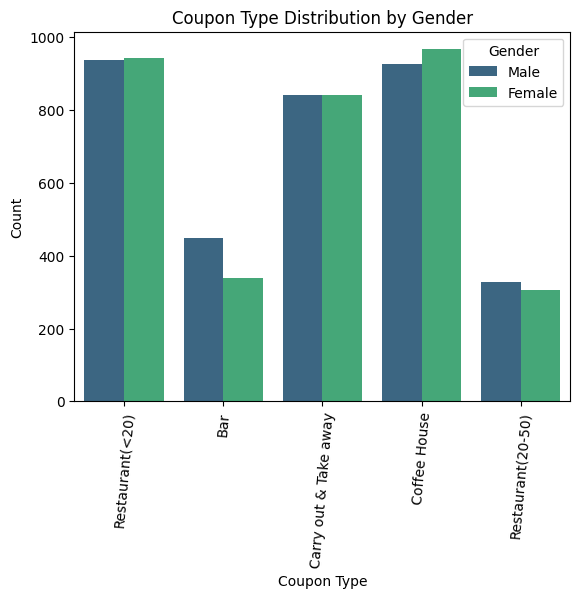

In [79]:
#Creating bar plot visualizing the coupon column

accepted = data[data['Y'] == 1]

sns.countplot(
    data = accepted,
    x = 'coupon',
    hue = 'gender',
    palette = 'viridis'
)

plt.xticks(rotation=85)
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Coupon Type Distribution by Gender')
plt.legend(title='Gender')
plt.show()

6. Use a histogram to visualize the temperature column.

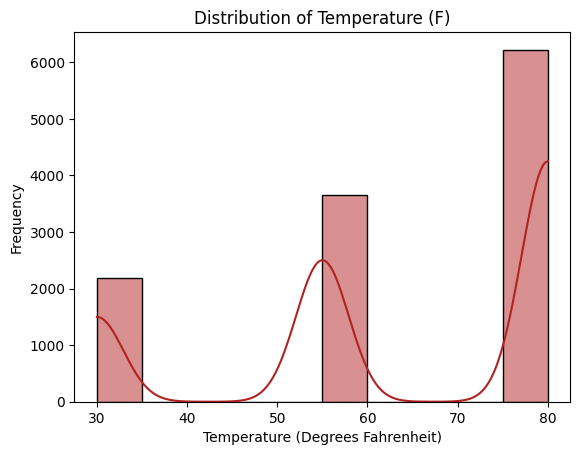

In [80]:
sns.histplot(
    data = data,
    x = 'temperature',
    bins = 10,
    kde = True,
    color = 'firebrick'
)

plt.xlabel('Temperature (Degrees Fahrenheit)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature (F)')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [81]:
#Creating new dataframe called bar_coupons
bar_coupons = data[data['coupon'] == 'Bar']

bar_coupons.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_numeric
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,21
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,21
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,1,1,0,1,1,21
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,0,1,0,46
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,1,0,0,46


2. What proportion of bar coupons were accepted?


In [82]:
acceptance_rate = bar_coupons['Y'].mean()
print(f"Bar Coupon Acceptance Rate: {acceptance_rate:.2%}")

Bar Coupon Acceptance Rate: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [83]:
#Identifying the unique rows in the Bar column to determine the different categories
bar_coupons['Bar'].unique()

#Creating list for <= 3 visits
infrequent_visitors = ['never', 'less1', "1~3"]

#Creating list for > 3 visits
frequent_visitors = ['4~8', 'gt8']

#Rate Calculations
acceptance_rate_3 = bar_coupons[bar_coupons['Bar'].isin(infrequent_visitors)]['Y'].mean()
acceptance_rate_4 = bar_coupons[bar_coupons['Bar'].isin(frequent_visitors)]['Y'].mean()

#Printing Results
print(f"Infrequent Visitors Acceptance Rate: {acceptance_rate_3:.2%}")
print(f"Frequent Visitors Acceptance Rate: {acceptance_rate_4:.2%}")

Infrequent Visitors Acceptance Rate: 37.27%
Frequent Visitors Acceptance Rate: 76.17%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [84]:
#Creating list for drivers who visit more than once
more_than_once = ['1~3', '4~8', 'gt8']

#Creating list for drivers who are over 25
over_25 = ['26', '31', '36', '41', '46', '50plus' ]

#Creating Filter
target = (bar_coupons['Bar'].isin(more_than_once)) & (bar_coupons['age'].isin(over_25))

#Performing Calculations
frequent_visits_over25 = bar_coupons[target]['Y'].mean()
all_others = bar_coupons[~target]['Y'].mean()

#Printing Results
print(f"Frequent Visitor & 25+ Acceptance Rate: {frequent_visits_over25:.2%}")
print(f"All Others Acceptance Rate: {all_others:.2%}")


Frequent Visitor & 25+ Acceptance Rate: 68.98%
All Others Acceptance Rate: 33.77%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [85]:
#Creating list for drivers who visit more than once
more_than_once = ['1~3', '4~8', 'gt8']

#Creating list for passengers
data['passenger'].unique()
not_kids = ['Friend(s)', 'Partner']
excluded_occupations = ['Farming Fishing & Forestry']

#Seeing all of the occupations
data['occupation'].unique()

#Creating for excluded occupations, frequent visits and visits w/ a passanger
frequent_visits = bar_coupons['Bar'].isin(more_than_once)
visits_with_passangers = bar_coupons['passenger'].isin(not_kids)
occupation_visits = ~bar_coupons['occupation'].isin(excluded_occupations)

#Rate Calculations
ideal_customers = bar_coupons[frequent_visits & visits_with_passangers & occupation_visits]['Y'].mean()

#Printing Results
print(f"Acceptance Rate for Customers: {ideal_customers:.2%}")


Acceptance Rate for Customers: 71.43%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [86]:
#Discovering column values for filtering
bar_coupons['Bar'].unique()
data['maritalStatus'].unique()
data['passenger'].unique()
data['RestaurantLessThan20'].unique()
data['income'].unique()

#Creating lists
more_than_once = ['1~3', '4~8', 'gt8']
not_kids = ['Friend(s)', 'Partner']
not_widowed = ['Widowed']
under_30 = ['below21', '21', '26']
restuarant_20 = ['4~8', 'gt8']
income50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

#Boolean Filters defining customer groups
plus1 = (bar_coupons['Bar'].isin(more_than_once))
nokids = (bar_coupons['passenger'].isin(not_kids))
notwidowed = (~bar_coupons['maritalStatus'].isin(not_widowed))
under30 = (bar_coupons['age'].isin(under_30))
restuarant20 = (bar_coupons['RestaurantLessThan20'].isin(restuarant_20))
income50 = (bar_coupons['income'].isin(income50k))

#Creating Groups
nonwidowed_adult_passengers = (plus1 & nokids & notwidowed)
frequent_under30 = (plus1 & under30)
cheap_restaurants = (restuarant20 & income50)

#Calculation Coupon Acceptance Rates for Selected Groups
nonw_adult_pass = bar_coupons[nonwidowed_adult_passengers]['Y'].mean()
freq_u30 = bar_coupons[frequent_under30]['Y'].mean()
cheap = bar_coupons[cheap_restaurants]['Y'].mean()
targeted_customers = bar_coupons[ nonwidowed_adult_passengers | frequent_under30 | cheap_restaurants]['Y'].mean()


#Printing Results
print(f"Acceptance Rate for Non-Widowed with Adult Passengers: {nonw_adult_pass:.2%}")
print(f"Acceptance Rate for Frequent Visitors Under 30: {freq_u30:.2%}")
print(f"Acceptance Rate for Cheap Restaurants: {cheap:.2%}")
print(f"Combined Acceptance Rate for all Targeted Customers: {targeted_customers:.2%}")



Acceptance Rate for Non-Widowed with Adult Passengers: 71.43%
Acceptance Rate for Frequent Visitors Under 30: 71.95%
Acceptance Rate for Cheap Restaurants: 45.65%
Combined Acceptance Rate for all Targeted Customers: 56.69%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [87]:
'''Based on these observations, I would hypothesize that if a driver has been to the establishment before, they are more likely to accept the coupon. If the driver has adult passengers, they are more than likely to stop by the restaurant in comparison to if they had children as passengers. Also younger drivers are significantly receptive to accepting the coupon compared to older drivers.'''

'Based on these observations, I would hypothesize that if a driver has been to the establishment before, they are more likely to accept the coupon. If the driver has adult passengers, they are more than likely to stop by the restaurant in comparison to if they had children as passengers. Also younger drivers are significantly receptive to accepting the coupon compared to older drivers.'

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

(3816, 26)

=== Coffee House Acceptance Rates by Occupation ==
occupation
Healthcare Practitioners & Technical         76.06%
Building & Grounds Cleaning & Maintenance    72.73%
Transportation & Material Moving             61.84%
Healthcare Support                           61.54%
Student                                      61.47%
Installation Maintenance & Repair            56.82%
Architecture & Engineering                   55.56%
Farming Fishing & Forestry                   54.55%
Unemployed                                   53.72%
Computer & Mathematical                      50.12%
Arts Design Entertainment Sports & Media     50.00%
Construction & Extraction                    47.83%
Personal Care & Service                      47.62%
Life Physical Social Science                 47.54%
Business & Financial                         47.18%
Management                                   45.39%
Production Occupations                       45.00%
Protective Service                        

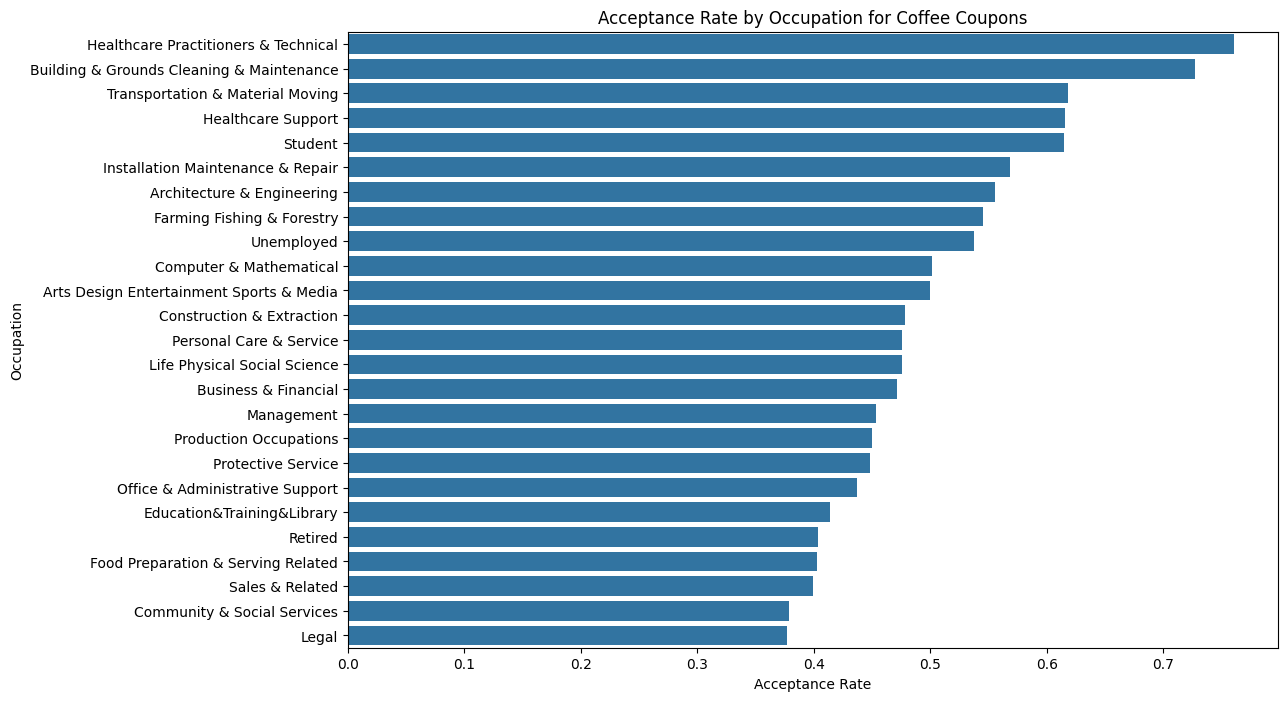

In [88]:
coffee_data = data[data['coupon'] == 'Coffee House']
print(coffee_data.shape)
coffee_data.head()

occupation_rates = coffee_data.groupby('occupation')['Y'].mean().sort_values(ascending=False)
formatted_rates = occupation_rates.apply(lambda x: f"{x:.2%}")

print("\n=== Coffee House Acceptance Rates by Occupation ==")
print(formatted_rates)

print("\n")
plt.figure(figsize=(12,8))
sns.barplot(x=occupation_rates.values, y=occupation_rates.index)
plt.xlabel('Acceptance Rate')
plt.ylabel('Occupation')
plt.title('Acceptance Rate by Occupation for Coffee Coupons')
plt.show()


Based on the graph, the data shows that healthcare workers and building/maintenance workers have the highest coupon acceptance rate compared to the other occupations.